In [30]:
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [31]:
# Generate 5 uncorrelated Gaussian random variables
mean = 0.01
std_dev = 0.1
num_samples = 1000
num_variables = 5

data = np.random.normal(mean, std_dev, (num_samples, num_variables))

data


array([[-0.0746347 ,  0.13366197, -0.03626447, -0.11630354, -0.03851299],
       [-0.02300527,  0.16549627,  0.10248262,  0.12475206,  0.09199736],
       [ 0.10462437, -0.05880821, -0.00986022, -0.08899153, -0.0110488 ],
       ...,
       [ 0.13328668, -0.03686605,  0.09888388,  0.10024917,  0.10525905],
       [ 0.04878273,  0.14773666,  0.0478354 ,  0.18135297, -0.15199198],
       [ 0.04482862,  0.03833236, -0.08365198,  0.06795842, -0.13900827]],
      shape=(1000, 5))

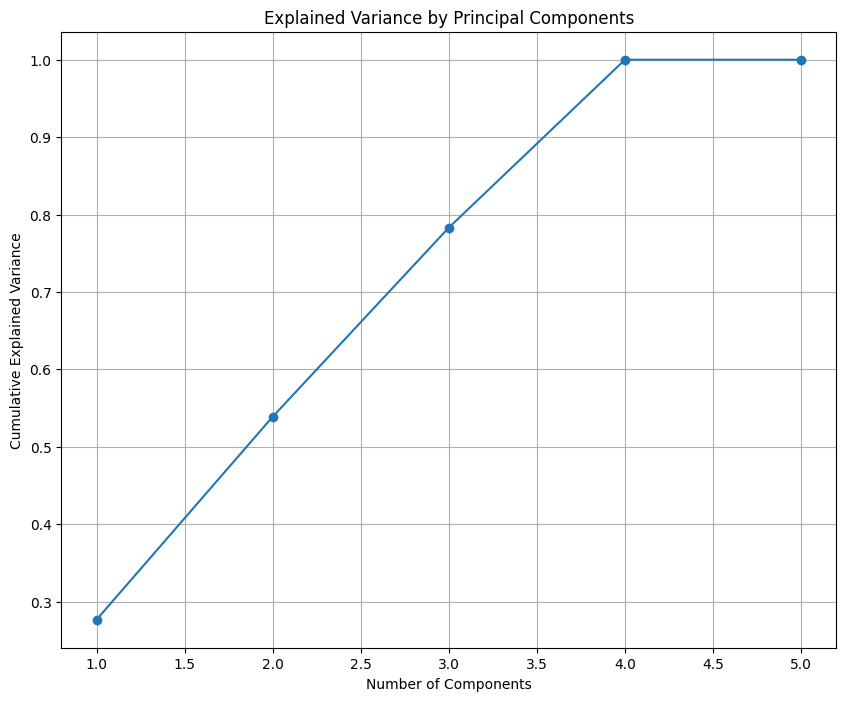

Principal Components:
 [[-0.32925584  0.24812914 -0.05322914 -0.5813098   0.69947702]
 [ 0.18996236 -0.01794441  0.74355805 -0.55946766 -0.31258544]
 [ 0.4160502   0.69250284 -0.42313263 -0.27144509 -0.30760103]
 [ 0.71541668 -0.52831297 -0.23918076 -0.2326783   0.3125984 ]
 [ 0.41302071  0.42359787  0.45611339  0.47037562  0.46977238]]


In [32]:
# Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Perform PCA using the covariance matrix
pca = PCA()
pca.fit(covariance_matrix)

# Step 4: Transform the data using the PCA model
transformed_data = pca.transform(covariance_matrix)

# Step 5: Plot the explained variance ratio
plt.figure(figsize=(10, 8))
plt.plot([1, 2, 3, 4, 5], np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Step 6: Display the principal components
print("Principal Components:\n", pca.components_)


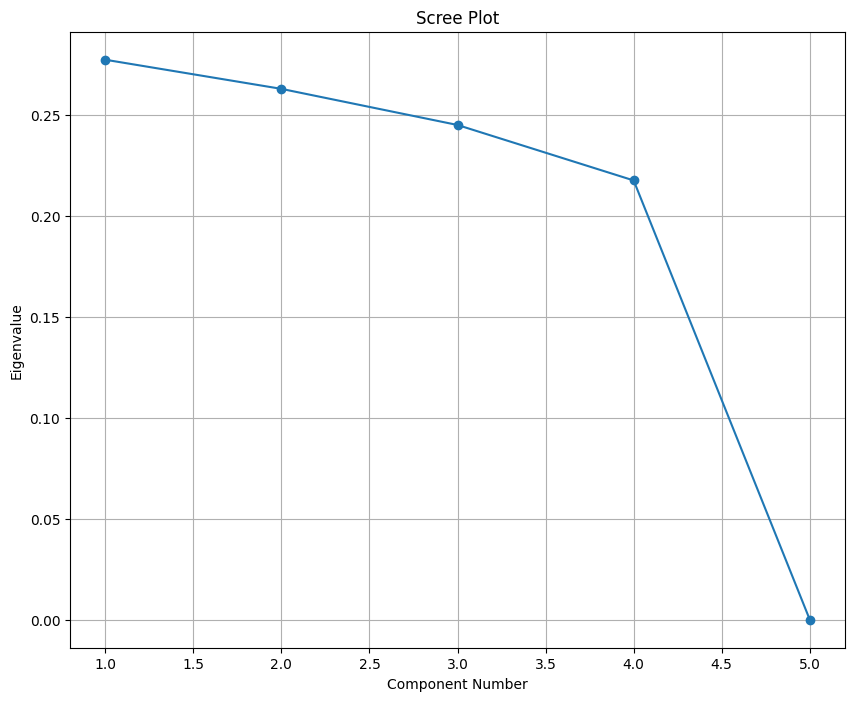

In [34]:
# Step 7: Produce a scree plot of the eigenvalues for each component
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


# Real data

### downloading 5 government securities
'^IRX': 13-week Treasury bill yield

'^FVX': 5-year Treasury note yield

'^TNX': 10-year Treasury note yield

'^TYX': 30-year Treasury bond yield

'^VIX': Volatility Index (often referred to as the "fear index")


In [35]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tickers for the 5 government securities
tickers = ['^IRX', '^FVX', '^TNX', '^TYX', '^VIX']

# Define the time period for the data collection
end_date = '2025-01-06'
start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=182)).strftime('%Y-%m-%d')

# Fetch the daily closing yields for the specified period
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  5 of 5 completed

Ticker       ^FVX   ^IRX   ^TNX   ^TYX   ^VIX
Date                                         
2024-07-08  4.225  5.218  4.269  4.458  12.37
2024-07-09  4.248  5.225  4.300  4.495  12.51
2024-07-10  4.239  5.225  4.280  4.470  12.85
2024-07-11  4.123  5.198  4.193  4.404  12.92
2024-07-12  4.111  5.198  4.189  4.402  12.46


In [36]:
# Ensure the Date column is in pandas datetime format
data.index = pd.to_datetime(data.index)

# Compute the daily yield changes
daily_yield_changes = data.diff().dropna()

# Display the first few rows of the daily yield changes
print(daily_yield_changes.head())


Ticker       ^FVX   ^IRX   ^TNX   ^TYX  ^VIX
Date                                        
2024-07-09  0.023  0.007  0.031  0.037  0.14
2024-07-10 -0.009  0.000 -0.020 -0.025  0.34
2024-07-11 -0.116 -0.027 -0.087 -0.066  0.07
2024-07-12 -0.012  0.000 -0.004 -0.002 -0.46
2024-07-15  0.021 -0.005  0.040  0.052  0.66


In [37]:
import numpy as np
from sklearn.decomposition import PCA

# Compute the covariance matrix of the daily yield changes
cov_matrix = np.cov(daily_yield_changes.T)

# Perform PCA on the covariance matrix
pca = PCA()
pca.fit(cov_matrix)

# Display the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Display the principal components
print("Principal components:")
print(pca.components_)


Explained variance ratio of each principal component:
[9.99999571e-01 4.22249085e-07 6.74475844e-09 5.59011369e-12
 1.82563765e-37]
Principal components:
[[-1.98613051e-03 -1.69597241e-04 -2.52968825e-03 -3.41369304e-03
   9.99988987e-01]
 [ 5.78942052e-01 -2.92245926e-02  5.90732787e-01  5.61236179e-01
   4.55520606e-03]
 [ 6.63308105e-01  3.88631504e-01 -2.36636469e-02 -6.39083099e-01
  -8.58177333e-04]
 [-4.43342756e-01  2.02440775e-01  7.92605255e-01 -3.66390276e-01
  -9.19039246e-05]
 [-1.68201410e-01  8.98403685e-01 -1.49148639e-01  3.77270800e-01
   7.28892006e-04]]


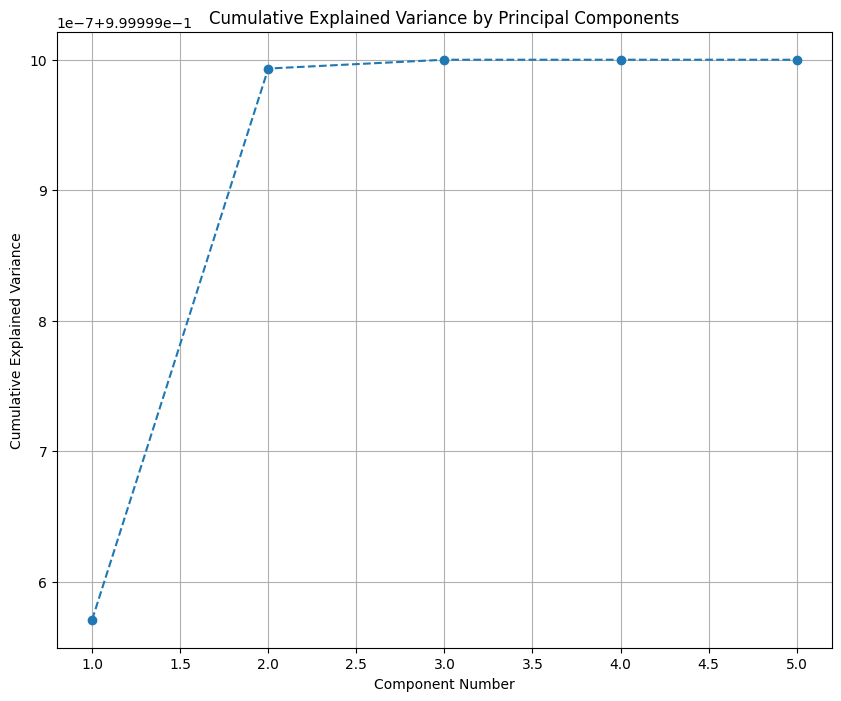

In [47]:
# Plot cumulative explained variance by principal components

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

plt.show()


In [45]:
# Answer this question as a comment:
# How do the variances of each component compare? In other words, how much
# variance is explained by Component 1, Component 2, Component 3, etc.?

# The variances explained by each component can be found in the explained_variance_ratio_ attribute of the PCA object.
# Let's print the explained variance ratio for each component in a more readable format.

explained_variance_ratio = pca.explained_variance_ratio_

for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {variance:.4f} variance explained")


Component 1: 1.0000 variance explained
Component 2: 0.0000 variance explained
Component 3: 0.0000 variance explained
Component 4: 0.0000 variance explained
Component 5: 0.0000 variance explained


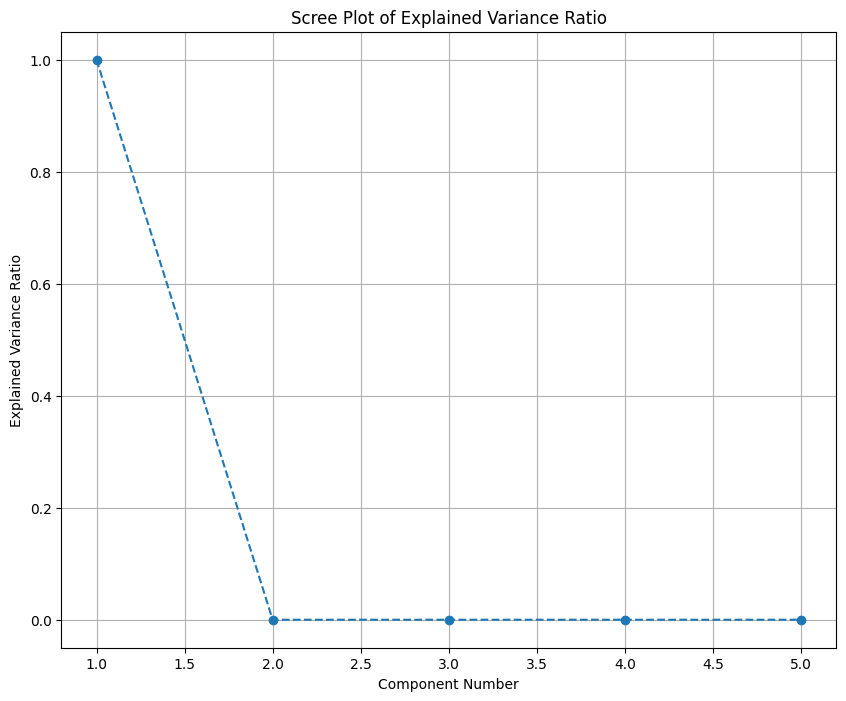

In [48]:
# Produce a screeplot of the variance explained for each component

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot of Explained Variance Ratio')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()
